**Klasifikasi Overall Rate Penyerang Sepak Bola UEFA & Copa America**
*   **La Ode Adriyan Hazmar**
*   **M. Ihsan An-Nashir**


*Memasukkan Dataset*

In [ ]:
!wget https://raw.githubusercontent.com/ihsanannashir/uefa-player-rating/main/dataset/copa-euro-revised.csv

--2021-11-27 16:09:54--  https://raw.githubusercontent.com/ihsanannashir/uefa-player-rating/main/copa-euro-revised.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5215 (5.1K) [text/plain]
Saving to: ‘copa-euro-revised.csv.1’

copa-euro-revised.c 100%[===================>]   5.09K  --.-KB/s    in 0s      

2021-11-27 16:09:54 (77.9 MB/s) - ‘copa-euro-revised.csv.1’ saved [5215/5215]



*Memasukkan Library*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

*Mendeklarasikan Variable Data*

In [ ]:
data = pd.read_csv("copa-euro-revised.csv")

*Menampilkan Data*

In [ ]:
data.head(10)

,name,country,minutes_played,goals,assist,top_speed,class
0,Adam Hložek,Czech Republic,76,0,0,26.8,D
1,Ádám Szalai,Hungary,1061,2,2,26.1,B
2,Akram Afif,Qatar,90,0,0,27.0,D
3,Aleksandar Trajkobski,North Macedonia,412,0,0,29.5,C
4,Aleksander Sobolev,Russia,35,0,0,24.8,D
5,Aleksei Miranchuk,Russia,432,2,0,29.5,C
6,Alexander Isak,Sweden,685,3,1,32.0,B
7,Alexis Sanchez,Chile,168,0,1,28.5,C
8,Almoez Ali,Qatar,270,2,0,28.8,C
9,Alvaro Morata,Spain,891,7,0,32.0,A


*Memilih Atribut dan Label*

In [ ]:
X = data.iloc[:, 2:5].values
y = data.iloc[:, 6].values

*Memisahkan Data Training dan Data Testing*

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=data['class'])

*Normalisasi Data*

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

*Menentukan nilai K dan Memulai Training*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

*Menampilkan Hasil Prediksi*

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4 0 0 0 0]
 [0 2 0 0 0]
 [1 0 3 3 0]
 [0 0 0 8 1]
 [0 0 0 2 3]]
              precision    recall  f1-score   support

           A       0.80      1.00      0.89         4
          A+       1.00      1.00      1.00         2
           B       1.00      0.43      0.60         7
           C       0.62      0.89      0.73         9
           D       0.75      0.60      0.67         5

    accuracy                           0.74        27
   macro avg       0.83      0.78      0.78        27
weighted avg       0.80      0.74      0.73        27



*Menghitung Error Rate nilai K*

In [ ]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

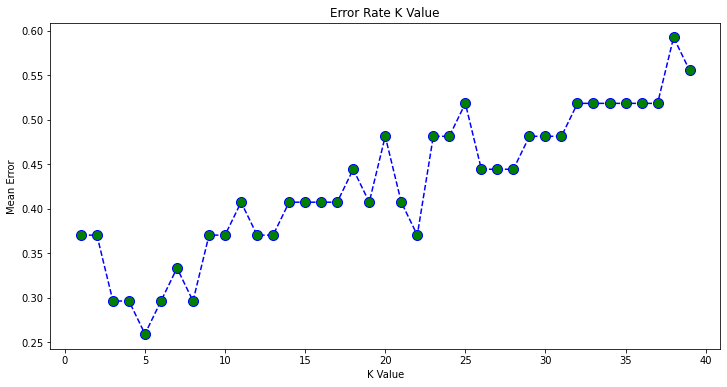

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')